In [6]:
import numpy as np
import pandas as pd 

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import os


# input 폴더내에 있는 파일리스트
print(os.listdir("../dogs_vs_cats_classification"))

['.ipynb_checkpoints', 'test1', 'train', 'Untitled.ipynb']


In [7]:
# 아직 용도는 알 수 없지만 다양한 변수를 만들어줍니다.
# 변수명으로 예측할때 이미지 사이즈와 관련이 있을 것 같습니다.

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [14]:
# 아래 변수명에 학습용 데이터를 불러옵니다.
filenames = os.listdir("../dogs_vs_cats_classification/train/train")


# 카테고리라는 리스트를 만들어봅니다.
categories = []


# 파일명을 돌면서...
# 파일명을 '.'을 기준으로 스플릿하여
# [0]번째 단어가 'dog'이면
# categories 리스트에 1을 추가하고
# dog이 아니면 0을 추가해라

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        
# 파일명별로 잘 분류되었는지 프린트해봅니다.
print(categories)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [17]:
# 파일명과 카테고리로 데이터 프레임을 만듭니다.

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# 데이터 프레임으로 잘 만들어졌는지 한번 봅니다.
# 저는 꼭 눈으로 봐야지 마음이 편합니다.
df


,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


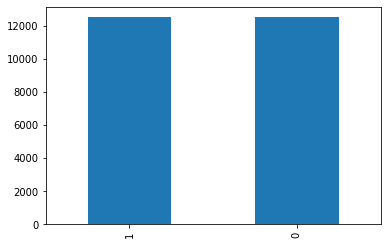

In [18]:
# 카테고리 기준으로 1(강아지)과 0(고양이)이 어느정도 분포되어있는지 확인해봅니다.
# 각 각 12000장을 비슷하게 웃도는 모습을 보니
# 학습데이터로 쓰기 딱 좋겠구나라는 생각이 듭니다.

df['category'].value_counts().plot.bar()

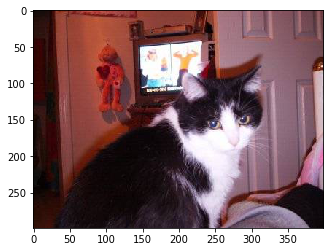

In [22]:
# 파일명으로 랜덤픽을 해봅니다.
# 베스트 컷을 찾아봅니다.
# 기분이 좋아집니다.

sample = random.choice(filenames)
image = load_img("./train/train/"+sample)
plt.imshow(image)

In [23]:
# 정확히는 모르겠지만 one hot 인코딩을 하려면
# 데이터 타입이 문자열이어야해서
# 0과 1로 바꾼 녀석들을 다시 cat과 dog으로 바꿔줍니다.

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [24]:
df

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
...,...,...
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog


In [25]:

# 학습용 데이터랑 검증용 데이터를 나눠봅니다.
# df중에서 20% 비율로 검증용 데이터를 만듭니다.
# 랜덤 스테이트는 42로 둡니다.
# 42로 맞춰놓으면 항상 같은 파일들로 분류합니다.

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

########################### 계속 나눠지니까 한번만 실행합니다.
########################### 두번이상 실행한 경우 위에서부터 다시 실행합니다.

In [27]:
# 랜덤하게 나눠진 두개의 데이터의 인덱스를
# 0부터 다시 설정합니다.

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [28]:
# 눈으로 확인
train_df

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat
...,...,...
19995,dog.6916.jpg,dog
19996,cat.36.jpg,cat
19997,cat.10771.jpg,cat
19998,dog.1713.jpg,dog


In [29]:
# 눈으로 확인
validate_df

,filename,category
0,cat.493.jpg,cat
1,dog.9112.jpg,dog
2,cat.745.jpg,cat
3,dog.11022.jpg,dog
4,dog.11363.jpg,dog
...,...,...
4995,cat.6551.jpg,cat
4996,cat.9403.jpg,cat
4997,cat.236.jpg,cat
4998,dog.6530.jpg,dog


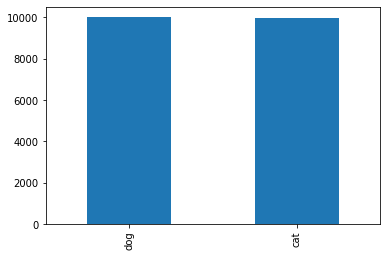

In [30]:
# 그래프로 확인
# 비등비등하게 잘 나뉜것 같습니다.
train_df['category'].value_counts().plot.bar()

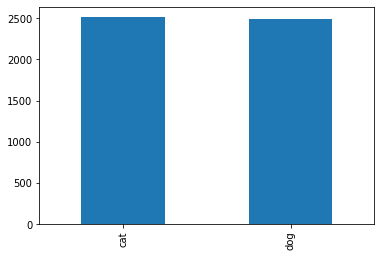

In [31]:
validate_df['category'].value_counts().plot.bar()

In [35]:
# 나누어진 데이터의 첫번째 값을
# total_이 붙은 변수에 넣어줍니다.
# batch_size도 미리 선언해 줍니다.
# 아직은 어떻게 사용될지 모르겠지만
# 쭉 지켜봅니다.

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# 눈으로 확인
print(total_train)
print(total_validate)
print(batch_size)

20000
5000
15


In [36]:
# 이미지 뻥튀기를 사용해보자
# 이미지 뻥튀기를 하는 이유
# 이미지수가 너무 적으면 과적합이 일어날 수 있습니다.

# 아래 속성에대해 배워보자
# 

train_datagen = ImageDataGenerator(
    rotation_range=15, # 정수 무작위 회전의 각도 범위
    rescale=1./255, # 크기 재조절 인수라고 합니다.
    shear_range=0.1, # 층밀리기에 강도입니다.
    zoom_range=0.2, # 무작위 줌의 범위입니다.
    horizontal_flip=True, # 무작위로 가로 뒤집기
    width_shift_range=0.1, # 무슨말인지 잘 모르겠습니다. 가로크기와 관련이 있는 것 같습니다.
    height_shift_range=0.1 # 무슨말인지 잘 모르겠습니다. 세로크기와 관련이 있는 것 같습니다.
)

In [48]:
# 데이터 프레임을 가져와
# 디렉토리 경로 + 배치를 다시 만듭니다.
# 생성된 배치에는 기능 보강/ 정규화된 데이터가 포함됩니다.
# 아래 속성에 대해 배워봅니다.

train_generator = train_datagen.flow_from_dataframe(
    train_df, # 학습용 데이터프레임
    "./train/train/", # 파일경로
    x_col='filename', # x축은 파일이름
    y_col='category', # y축은 카테고리명
    target_size=IMAGE_SIZE, # 위에서 선언한 이미지 사이즈로 불러온 모든 이미지의 사이즈가 조정됩니다.
    class_mode='categorical', # 2차원 배열이므로 카테고리컬 모드를 사용합니다.
    batch_size=batch_size # 위에서 선언한 배치 사이즈를 정해줍니다.
)

Found 20000 validated image filenames belonging to 2 classes.


In [47]:
# 검증용 데이터도 똑같이 다뤄줍니다~
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [49]:
# 뻥튀기가 잘 되었는지 한번 확인해봅시다
# 샘픔 데이터 프레임을 만들어봅니다.
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


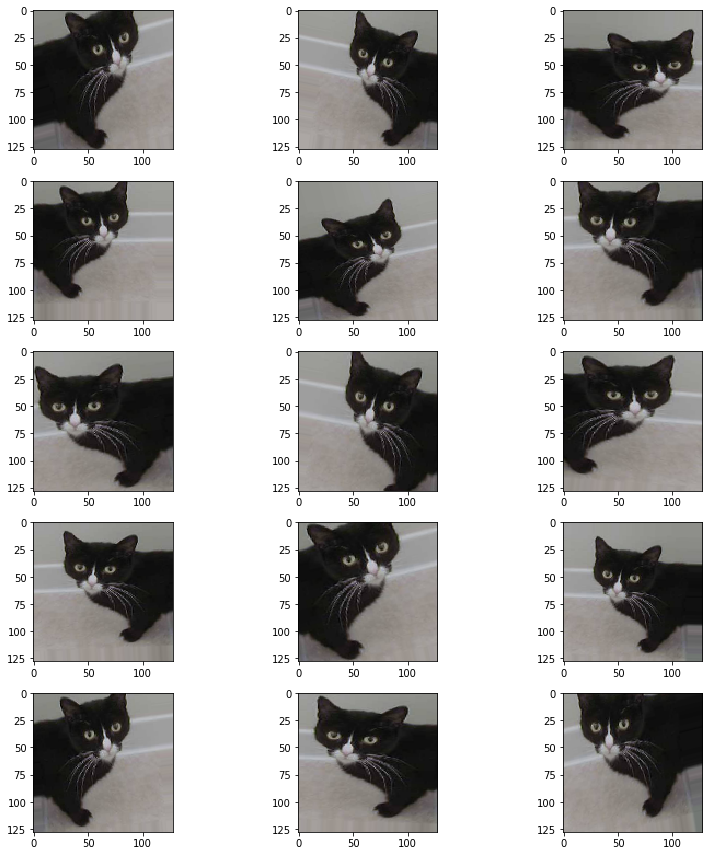

In [59]:
# 위에서 랜덤으로 픽업한 이미지를 
# 15개 이상의 이미지로 뻥튀기한 결과입니다.


plt.figure(figsize=(12, 12)) # 이미지 하나당 사이즈
for i in range(0, 15): # 0부터 15까지 돌립니다
    plt.subplot(5, 3, i+1) # 5열 3행짜리 빈 도화지 속에 i+1번째 순서에 각각
    for X_batch, Y_batch in example_generator: # 샘플 제네레이터로 만든 그림에서 X_batch,Y_batch를 뽑아와서
        image = X_batch[0] # X_batch의 첫번째 값을 이미지라는 변수에 넣고 (무슨말인지 잘 모르겠습니다.)
        plt.imshow(image) # 이미지를 출력합니다.
        break
plt.tight_layout() # 레이아웃을 타이트하게 채워줍니다. 삭제시 그림이 작아집니다.
plt.show()

# 데이터 준비끝
# 이제 모델을 만들어봅시다.

In [60]:
# keras에서 이것저것 불러옵니다.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [61]:
# 과적합 성향을 보이기 시작하면 콜백을 부릅니다.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [62]:
# 10번의 epoches 동안 로쓰값이 줄어들지 않으면 멈추자는 약속
earlystop = EarlyStopping(patience=10)

In [63]:
# 2번 도는 동안 정확도가 올라가지 않으면 학습속도를 줄이겠다는 약속
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [64]:
# 그 모든것을 콜백에 담았습니다.
callbacks = [earlystop, learning_rate_reduction]

In [66]:
# 만든 모델에 한번 돌려봅시다!
epochs=3 # if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
 518/1333 [==========>...................] - ETA: 7:37 - loss: 0.9345 - accuracy: 0.5853

KeyboardInterrupt: 